<a href="https://colab.research.google.com/github/dhanushpachabhatla/How_do_we_use_maths_in_ML/blob/main/central_limit_theroem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applications of Central-Limit-Theorem

* can find avg, standard deviation of whole population using samples

steps:
1. Take some random samples from the dataset, length>30
2. Calculate mean of each sample set
3. The distribution will form Normal Distribution
4. Then can cal avg, standard dev of population using samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

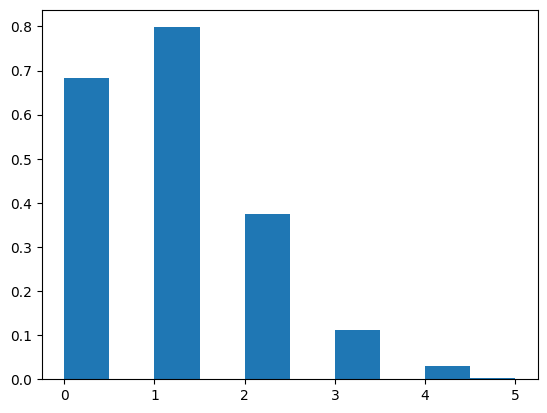

In [2]:
n = 10  # number of trials
p = 0.1  # probability of success
size = 1000  # number of samples to generate

binomial_dist = np.random.binomial(n, p, size)

plt.hist(binomial_dist,density=True)
plt.show()

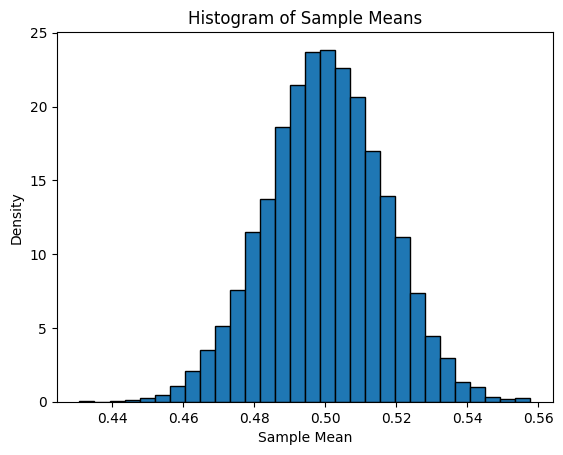

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_samples = 10000
sample_size = 300
distribution_range = (0, 1)

# Generate samples from a uniform distribution
samples = np.random.uniform(distribution_range[0], distribution_range[1], (num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, density=True, edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()


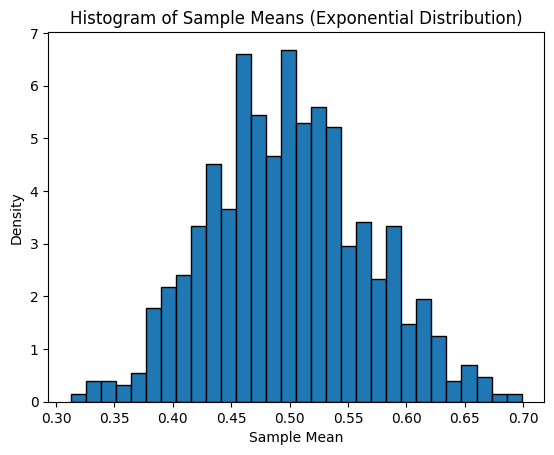

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_samples = 1000
sample_size = 50
lambda_param = 2

# Generate samples from an exponential distribution
samples = np.random.exponential(scale=1/lambda_param, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, density=True, edgecolor='black')
plt.title('Histogram of Sample Means (Exponential Distribution)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()


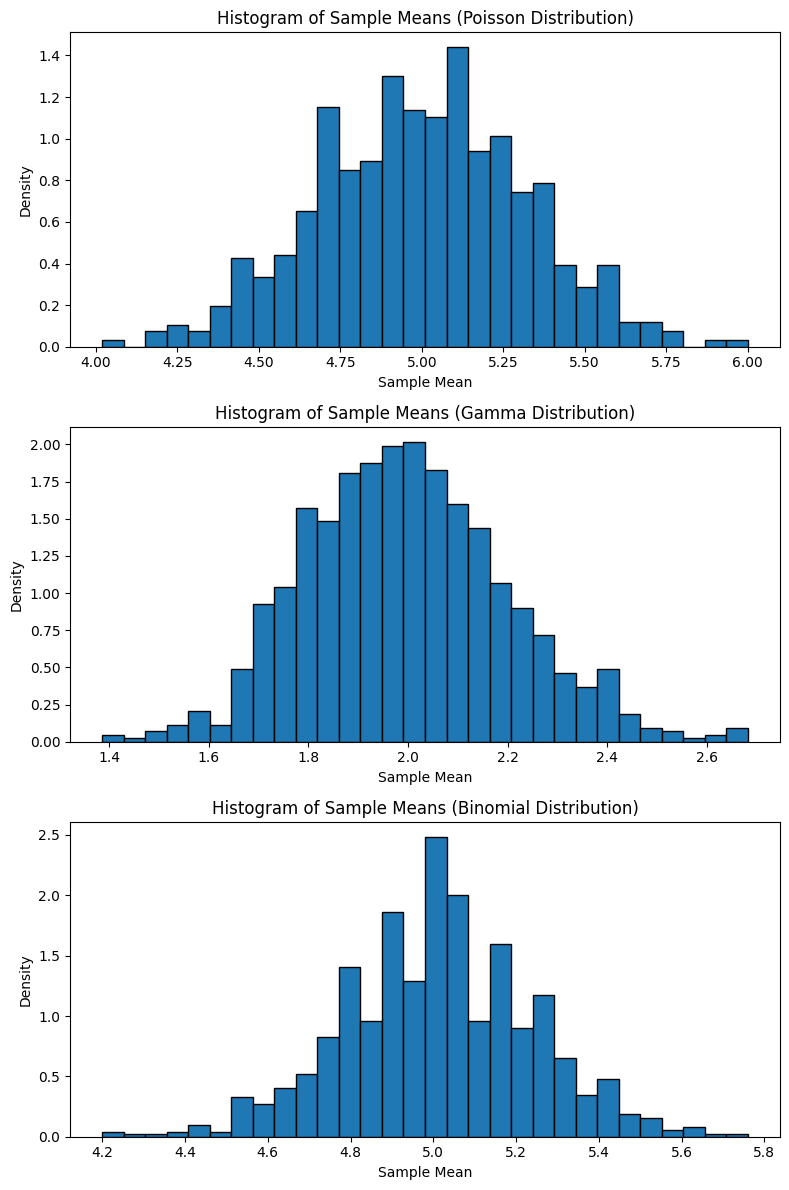

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_samples = 1000
sample_size = 50

# Poisson distribution parameters
poisson_lambda = 5

# Gamma distribution parameters
gamma_shape = 2
gamma_scale = 1

# Binomial distribution parameters
binomial_n = 10
binomial_p = 0.5

# Generate samples from the distributions
poisson_samples = np.random.poisson(lam=poisson_lambda, size=(num_samples, sample_size))
gamma_samples = np.random.gamma(shape=gamma_shape, scale=gamma_scale, size=(num_samples, sample_size))
binomial_samples = np.random.binomial(n=binomial_n, p=binomial_p, size=(num_samples, sample_size))

# Calculate the sample means
poisson_means = np.mean(poisson_samples, axis=1)
gamma_means = np.mean(gamma_samples, axis=1)
binomial_means = np.mean(binomial_samples, axis=1)

# Plot the histograms of the sample means
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Poisson distribution
axs[0].hist(poisson_means, bins=30, density=True, edgecolor='black')
axs[0].set_title('Histogram of Sample Means (Poisson Distribution)')
axs[0].set_xlabel('Sample Mean')
axs[0].set_ylabel('Density')

# Gamma distribution
axs[1].hist(gamma_means, bins=30, density=True, edgecolor='black')
axs[1].set_title('Histogram of Sample Means (Gamma Distribution)')
axs[1].set_xlabel('Sample Mean')
axs[1].set_ylabel('Density')

# Binomial distribution
axs[2].hist(binomial_means, bins=30, density=True, edgecolor='black')
axs[2].set_title('Histogram of Sample Means (Binomial Distribution)')
axs[2].set_xlabel('Sample Mean')
axs[2].set_ylabel('Density')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()



# CLT Demo Log Normal Distribution

In [6]:
import numpy as np

# Set the parameters
num_samples = 10000
sample_size = 50

# Log-Normal distribution parameters
mu = 0.5
sigma = 0.7

# Calculate the theoretical mean and variance
theoretical_mean = np.exp(mu + (sigma ** 2) / 2)
theoretical_variance = (np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2)

# Generate samples from the Log-Normal distribution
samples = np.random.lognormal(mean=mu, sigma=sigma, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)

# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")


Theoretical mean: 2.1064
Empirical mean: 2.1063


Theoretical variance: 2.8056
Empirical variance: 0.0561


CLT Case Study

In [7]:
import numpy as np

# Set the parameters
population_size = 100000
sample_size = 50
num_samples = 100

# Generate a random representative sample of salaries (in thousands)
# You should replace this with actual collected salary data
np.random.seed(42)  # Setting a seed for reproducibility
population_salaries = np.random.lognormal(mean=4.5, sigma=0.8, size=population_size)

# Generate multiple samples and calculate the sample means and standard deviations
sample_means = []
sample_std_devs = []

for _ in range(num_samples):
  sample_salaries = np.random.choice(population_salaries, size=sample_size)
  sample_means.append(np.mean(sample_salaries))
  sample_std_devs.append(np.std(sample_salaries))

# Calculate the average of the sample means and the standard error
average_sample_means = np.mean(sample_means)
standard_error = np.std(sample_means) / np.sqrt(num_samples)

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
lower_limit = average_sample_means - margin_of_error
upper_limit = average_sample_means + margin_of_error

# Report the results
print(f"Estimated average salary (in thousands): {average_sample_means:.2f}")
print(f"95% confidence interval (in thousands): ({lower_limit:.2f}, {upper_limit:.2f})")


Estimated average salary (in thousands): 124.74
95% confidence interval (in thousands): (121.23, 128.26)
